In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tqdm
import random

from experiments.npe.model import get_npe_model
from experiments.npe.simulate import show_simulation
from renderer.threecircles import ThreeCircles
from experiments.playconf.environment import Environment, initialize_scene_from_configuration, make_training
from experiments.playconf.rl import get_actor, get_experience, get_critic, get_joint, get_random_experience, get_naive_adversarial_loss

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/home/shreyask/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/pymunk/libchipmunk.so]


In [2]:
with open('data/threecircles_npe_munk1.p', 'rb') as f:
    data = pickle.load(f)

val_x, val_y = data['val']

c = list(zip(val_x, val_y))
random.shuffle(c)
val_x, val_y = zip(*c)

def breakdown(X):
    return [
        np.array([x[0] for x in X]),
        np.array([x[1] for x in X]),
        np.array([x[2] for x in X]),
        np.array([x[3] for x in X]),
        np.array([x[4] for x in X]),
    ]

b_val_x = breakdown(val_x)

In [3]:
scene = ThreeCircles(headless=False)

In [ ]:
model = tf.keras.models.load_model('model_zoo/npe_munk1.h5')
env = Environment(model, episodes=3, batch_size=4096)

In [14]:
model = get_npe_model(max_pairs = 2)
env = Environment(model, episodes=3, batch_size=4096)

In [15]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0003)
model.compile(loss='mse', optimizer=opt)

losses = {
    'train': [],
    'val': [],
}

for iteration in range(100):
    if (iteration + 1) % 5 == 0:
        configs, examples = get_naive_adversarial_loss(env, sample_pick=128, target=4096)
    else:
        configs, examples = get_naive_adversarial_loss(env, sample_pick=4096, target=4096)
    X, y = make_training(examples)
    
    show_simulation(model, length=10)
    
    history = model.fit(X, y, validation_data=(b_val_x, np.array(val_y)), epochs=1, batch_size=50)
    
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    
    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    
    print('Iteration', iteration, 'Train Loss', train_loss, 'Val Loss', val_loss)

Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 3s 766us/sample - loss: 0.0970 - val_loss: 0.1174
Iteration 0 Train Loss 0.09700601607619319 Val Loss 0.11735395804047584
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 452us/sample - loss: 0.0868 - val_loss: 0.1231
Iteration 1 Train Loss 0.08678877350030234 Val Loss 0.12310231249779463
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 449us/sample - loss: 0.0789 - val_loss: 0.1191
Iteration 2 Train Loss 0.07885623617585225 Val Loss 0.11912654664367438
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 448us/sample - loss: 0.0711 - val_loss: 0.1190
Iteration 3 Train Loss 0.07106274216675956 Val Loss 0.11898884769529104
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 454us/sample - loss: 0.1913 - val_loss:

Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 443us/sample - loss: 0.0395 - val_loss: 0.0625
Iteration 38 Train Loss 0.039491958566031826 Val Loss 0.06254653895273804
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 451us/sample - loss: 0.1682 - val_loss: 0.0985
Iteration 39 Train Loss 0.1681715991726378 Val Loss 0.09852281667292118
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 446us/sample - loss: 0.0435 - val_loss: 0.0678
Iteration 40 Train Loss 0.04346104332489631 Val Loss 0.0677551593258977
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 450us/sample - loss: 0.0387 - val_loss: 0.0735
Iteration 41 Train Loss 0.03866159720928408 Val Loss 0.07346912050619721
Train on 4096 samples, validate on 10000 samples
4096/4096 [==============================] - 2s 445us/sample - loss: 0.0391 - val_lo

KeyboardInterrupt: 

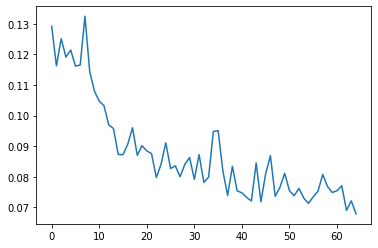

In [59]:
plt.plot(losses['val'])

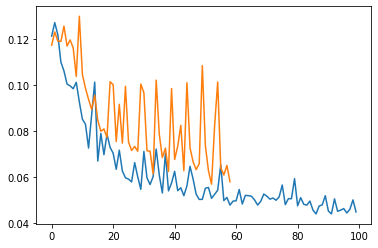

In [16]:
plt.plot(baseline['val'])
#plt.plot(exp1_losses['val'])
plt.plot(losses['val'])

In [5]:
with open('random_baseline_losses.p', 'rb') as f:
    baseline = pickle.load(f)

In [62]:
exp1_losses = losses.copy()